In [ ]:
import numpy as np 
class ADALINE_GD(object):
  def __init__(self,eta = 0.001,n_iter=50,random_state = 1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = 1

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += -self.eta * X.T.dot(-errors)
      self.w_[0] += -self.eta * -errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self,X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [ ]:
import pandas as pd
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header = None)

In [ ]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)


In [ ]:
X = df.iloc[0:100,[0,2]].values

In [ ]:
ada1 = ADALINE_GD(n_iter = 10,eta=0.01).fit(X,y)
ada2 = ADALINE_GD(n_iter = 10,eta=0.0001).fit(X,y)

Text(0.5, 1.0, 'ADALInE = learning rate 0.0001')

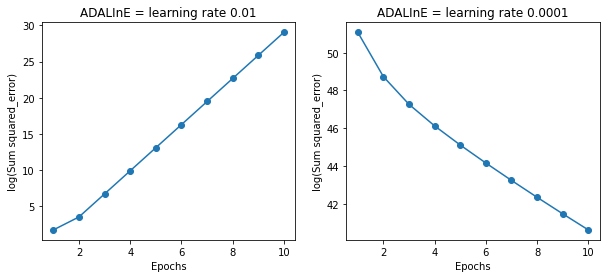

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fi,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,4))

ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker ='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Sum squared_error)')
ax[0].set_title('ADALInE = learning rate 0.01')


ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker ='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel('log(Sum squared_error)')
ax[1].set_title('ADALInE = learning rate 0.0001')

In [ ]:
print(np.log10(ada1.cost_))

print(ada2.cost_)
# дает нам короче узнать сколько степерь - лог10 

[ 1.70826132  3.50677577  6.69955949  9.89275214 13.08594501 16.27913788
 19.47233075 22.66552362 25.85871649 29.05190936]
[51.08122709777622, 48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111]


Text(0.5, 1.0, 'ADALInE = learning rate 0.0001')

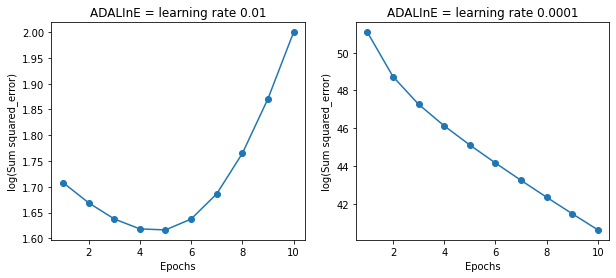

In [ ]:
ada1 = ADALINE_GD(n_iter = 10,eta=0.00055).fit(X,y)
ada2 = ADALINE_GD(n_iter = 10,eta=0.0001).fit(X,y)

import matplotlib.pyplot as plt
%matplotlib inline

fi,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,4))

ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker ='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Sum squared_error)')
ax[0].set_title('ADALInE = learning rate 0.01')


ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker ='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel('log(Sum squared_error)')
ax[1].set_title('ADALInE = learning rate 0.0001')

In [ ]:
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()  
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()  

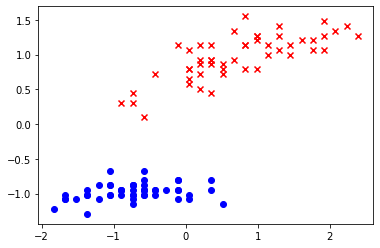

In [ ]:
plt.scatter(X_std[:50,0],X_std[:50,1],color ='blue',marker = 'o', label = 'setosa' )
plt.scatter(X_std[50:,0],X_std[50:,1],color ='red',marker = 'x', label = 'versicolor' )
plt.show()

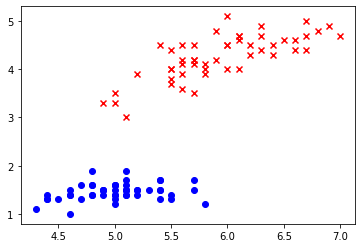

In [ ]:
plt.scatter(X[:50,0],X[:50,1],color ='blue',marker = 'o', label = 'setosa' )
plt.scatter(X[50:,0],X[50:,1],color ='red',marker = 'x', label = 'versicolor' )
plt.show()

Text(0.5, 1.0, 'ADALInE = learning rate 0.0001')

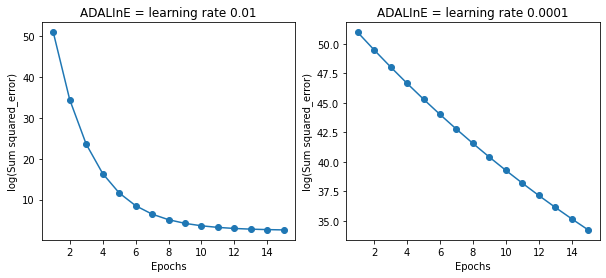

In [ ]:
ada1 = ADALINE_GD(n_iter = 15,eta=0.01).fit(X_std,y)
ada2 = ADALINE_GD(n_iter = 15,eta=0.0001).fit(X_std,y)

import matplotlib.pyplot as plt
%matplotlib inline

fi,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,4))

ax[0].plot(range(1,len(ada1.cost_)+1),ada1.cost_,marker ='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Sum squared_error)')
ax[0].set_title('ADALInE = learning rate 0.01')


ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker ='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel('log(Sum squared_error)')
ax[1].set_title('ADALInE = learning rate 0.0001')

In [ ]:
ada1.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
# plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=cl,
    edgecolor='black')

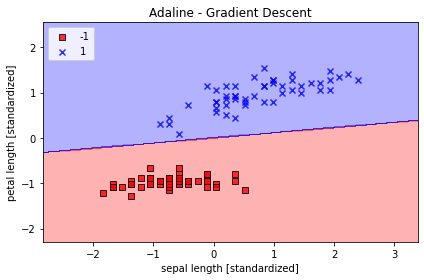

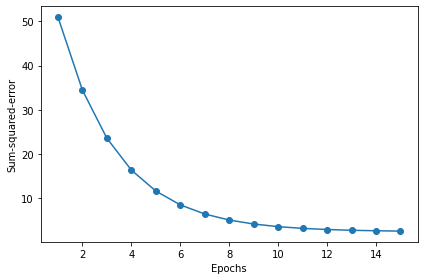

In [ ]:
ada_gd = ADALINE_GD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [ ]:
y_perc1 = df.iloc[0:150,4].values
y_perc1 = np.where(y_perc1 == "Iris-versicolor",1,-1)
y_perc1

y_perc0 = df.iloc[0:150,4].values
y_perc0 = np.where(y_perc0 == "Iris-setosa",1,-1)
y_perc0

y_perc2 = df.iloc[0:150,4].values
y_perc2 = np.where(y_perc2 == "Iris-virginica",1,-1)
y_perc2

X = df.iloc[:,0:4].values

#INGERENCJA W DANE
for index in range(100,150):
  X[index][2] -= 1.6
  X[index][3] -=2.2


X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

In [ ]:
ada_0 = ADALINE_GD(n_iter = 20000,eta=0.0022)
ada_0.fit(X_std,y_perc0)
ada_1 = ADALINE_GD(n_iter = 20000,eta=0.0022)
ada_1.fit(X_std,y_perc1)
ada_2 = ADALINE_GD(n_iter = 20000,eta=0.0022)
ada_2.fit(X_std,y_perc2)

Text(0.5, 1.0, 'ADALInE = learning rate 0.0001')

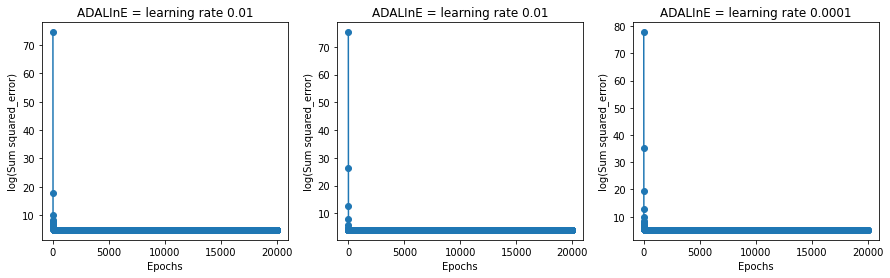

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fi,ax = plt.subplots(nrows = 1, ncols = 3,figsize = (15,4))

ax[0].plot(range(1,len(ada_0.cost_)+1),ada_0.cost_,marker ='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Sum squared_error)')
ax[0].set_title('ADALInE = learning rate 0.01')

ax[1].plot(range(1,len(ada_1.cost_)+1),ada_1.cost_,marker ='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel('log(Sum squared_error)')
ax[1].set_title('ADALInE = learning rate 0.01')


ax[2].plot(range(1,len(ada_2.cost_)+1),ada_2.cost_,marker ='o')
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel('log(Sum squared_error)')
ax[2].set_title('ADALInE = learning rate 0.0001')





In [ ]:

ada_1.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
def predictMethod(X):
  answers = pd.DataFrame({"setoza" : ada_0.predict(X),"versicolor" : ada_1.predict(X),"virginca" : ada_2.predict(X)})
  predictArr = []
  for i in range(0,answers.shape[0]):
    if answers.iloc[i,0] == 1:
      predictArr.append('setoza')
    elif answers.iloc[i,1] == 1:
      predictArr.append('versicolor')
    else:
      predictArr.append('virginca')
  answers['kind'] = predictArr
  return answers

In [ ]:
predictMethod(X_std).iloc[50:150]

,setoza,versicolor,virginca,kind
50,-1,1,-1,versicolor
51,-1,1,-1,versicolor
52,-1,1,-1,versicolor
53,-1,1,-1,versicolor
54,-1,1,-1,versicolor
...,...,...,...,...
145,-1,-1,1,virginca
146,-1,-1,1,virginca
147,-1,-1,1,virginca
148,-1,-1,1,virginca


In [ ]:
df.iloc[120]

0               6.9
1               3.2
2               5.7
3               2.3
4    Iris-virginica
Name: 120, dtype: object